In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
path_train = "/Users/pahan/Desktop/data-analys/EDA/dataset/house-prices-advanced-regression-techniques/train.csv"
path_test = "/Users/pahan/Desktop/data-analys/EDA/dataset/house-prices-advanced-regression-techniques/test.csv"

data_train = pd.read_csv(path_train, index_col="Id")
data_test = pd.read_csv(path_test, index_col="Id")

In [3]:
print(data_train.shape)
drop_columns = data_train.columns[data_train.isnull().sum() > 300]
data_train = data_train.drop(columns=drop_columns)
print(data_train.shape)

(1460, 80)
(1460, 74)


In [4]:
drop_columns

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [5]:
nan_columns = data_train.columns[data_train.isnull().sum() > 0]
nan_columns_objects = data_train[nan_columns].select_dtypes("object").columns
nan_columns_int = data_train[nan_columns].select_dtypes(['int64', "float64"]).columns
print(nan_columns_objects, nan_columns_int, sep="\n")


Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [6]:
data_train[nan_columns_int] = data_train[nan_columns_int].fillna(data_train[nan_columns_int].median())

for col in nan_columns_objects:
    data_train[col] = data_train[col].fillna(data_train[col].mode()[0])

<Axes: >

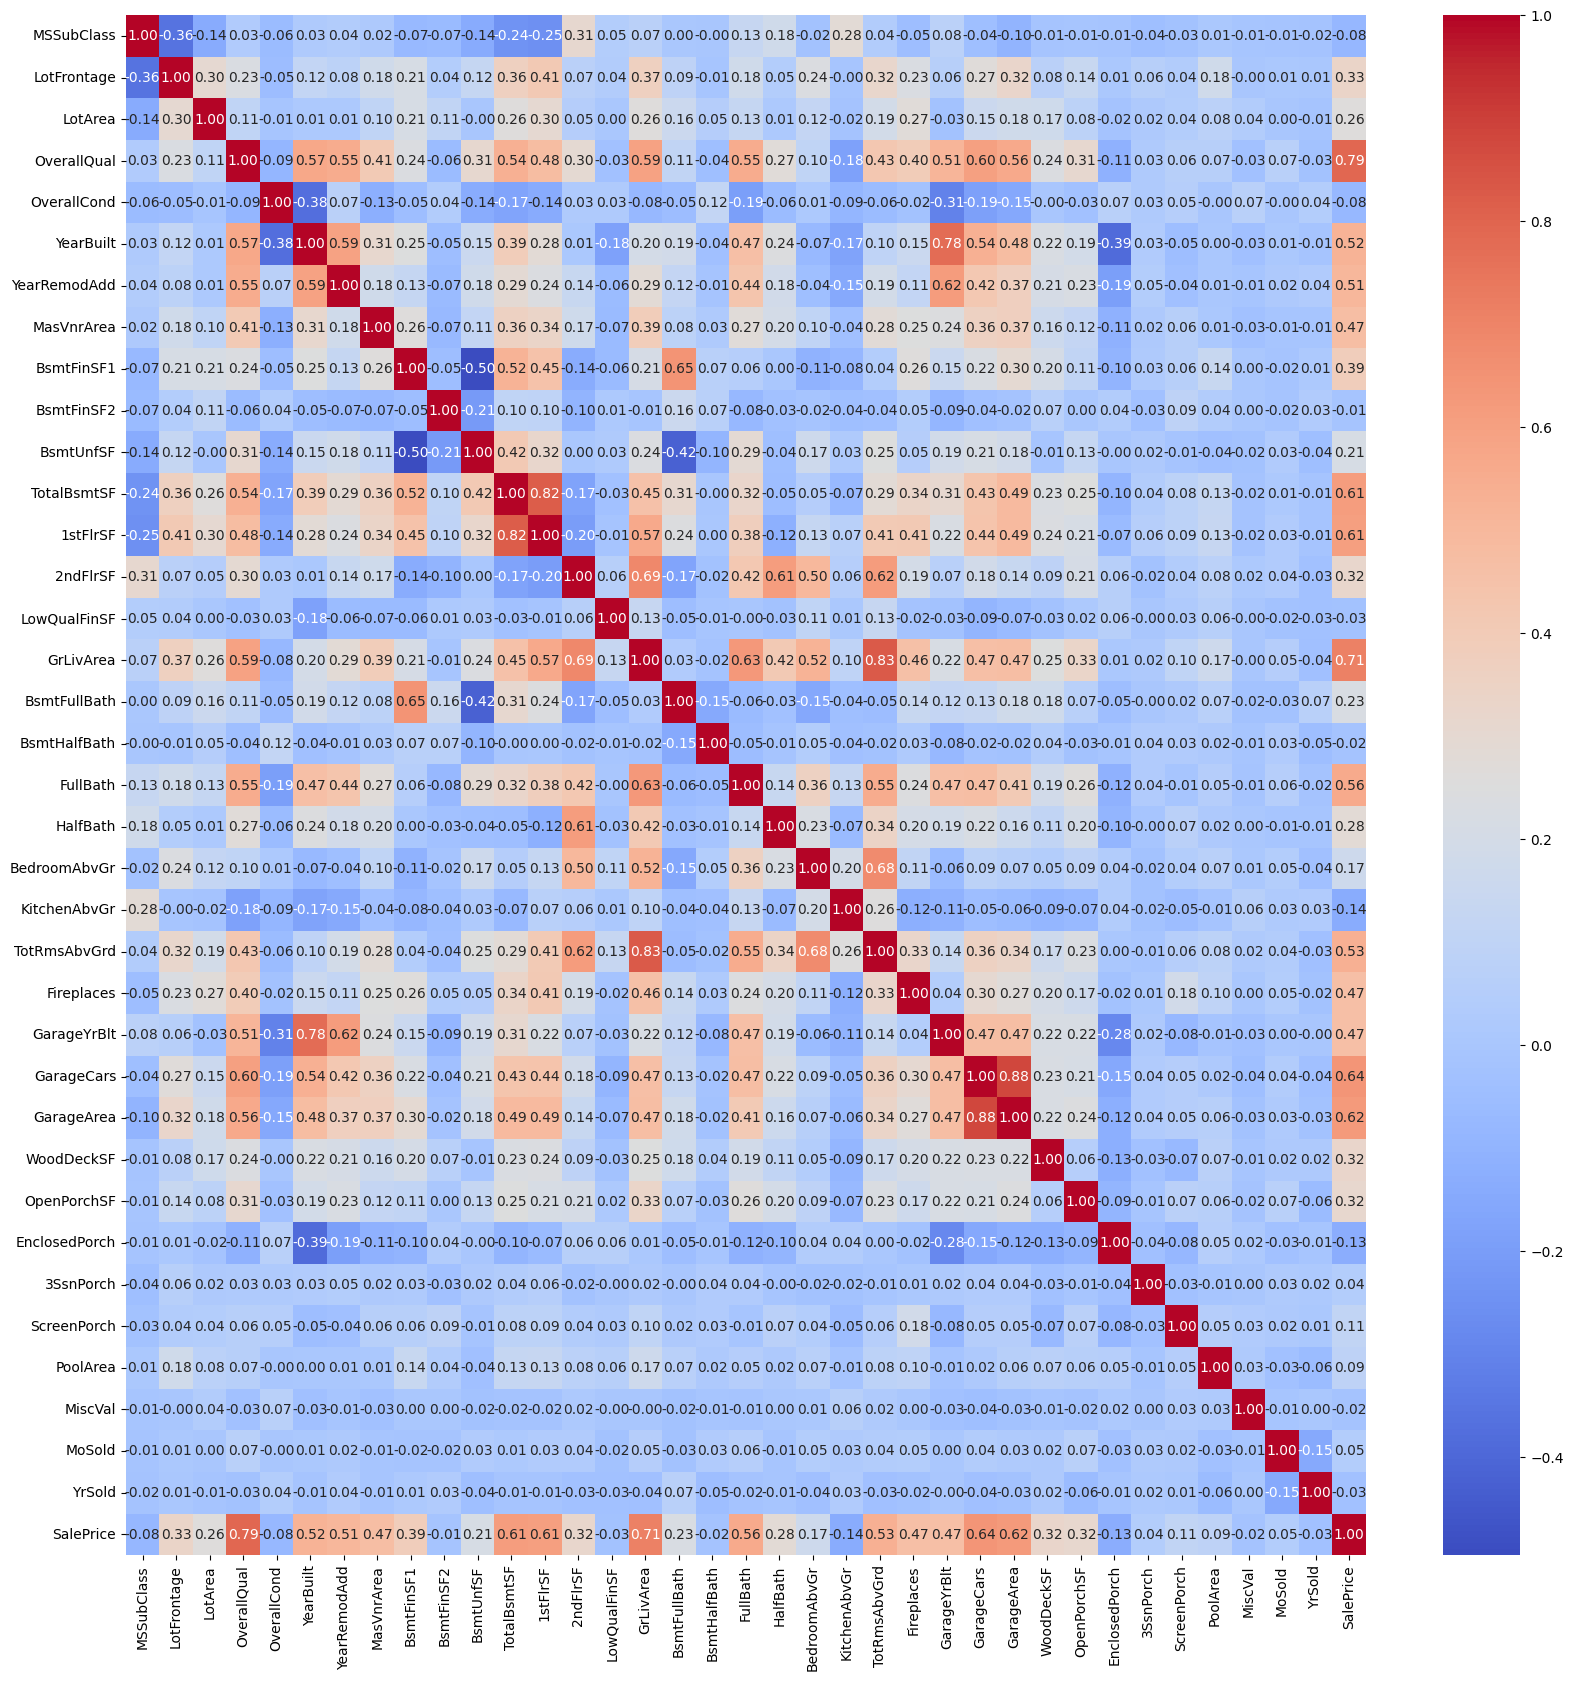

In [7]:
matrix_corr = data_train.select_dtypes(["float64", "int64"]).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matrix_corr, annot=True, fmt=".2f", cmap="coolwarm")

In [8]:
columns = list(matrix_corr.columns)
threshold = 0.4  
features = set()

for col in columns:
    correlated = False
    for f in features:
        if abs(matrix_corr.loc[col, f]) > threshold:
            correlated = True
            break
    if not correlated:
        features.add(col)

len(features)

21

In [9]:
target_corr_more_20 = matrix_corr.loc[list(features), "SalePrice"][matrix_corr.loc[list(features), "SalePrice"].sort_values(ascending=False).abs() > 0.2]

In [10]:
target_corr_more_20 = target_corr_more_20.sort_values(ascending=False)

In [11]:
data_train_X = data_train[target_corr_more_20.index]
data_train_y = data_train["SalePrice"] 

X_train, X_test, y_train, y_test = train_test_split(
    data_train_X, data_train_y, test_size=0.2, random_state=42
)

In [34]:
linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
X_test.columns

Index(['OverallQual', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'LotArea'],
      dtype='object')

In [14]:
linreg.coef_

array([3.52606040e+04, 1.04814517e+04, 2.82382463e+01, 2.19230145e+02,
       6.05089870e+01, 1.97362996e+01, 4.98316891e+01, 6.76275874e-01])

In [15]:
print(mae, mse**.5, r2, sep="\n")

28257.523304462316
43996.59651451699
0.7476377858548637


In [16]:
ridgereg = Ridge().fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
ridgereg.coef_

array([3.52416321e+04, 1.04653556e+04, 2.82516396e+01, 2.19463834e+02,
       6.05503756e+01, 1.97551686e+01, 4.99154168e+01, 6.76334022e-01])

In [18]:
print(mae, mse**.5, r2, sep="\n")

28255.631290236768
43997.60041322226
0.7476262691008195


In [19]:
lassoreg = Lasso().fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
lassoreg.coef_

array([3.52602689e+04, 1.04787104e+04, 2.82391170e+01, 2.19240344e+02,
       6.05109450e+01, 1.97372874e+01, 4.98346291e+01, 6.76302169e-01])

In [21]:
print(mae, mse**.5, r2, sep="\n")

28257.383603513288
43996.65016202786
0.7476371704157637


Infarance 

In [22]:
data_test_main = data_test[target_corr_more_20.index]

In [23]:
data_test_main.loc[:, "BsmtFinSF1"] = data_test_main["BsmtFinSF1"].fillna(data_test_main["BsmtFinSF1"].mean())

In [24]:
data_test_main.loc[:, "LotFrontage"] = data_test_main["LotFrontage"].fillna(data_test_main["LotFrontage"].mean())

In [26]:
data_test_main

,OverallQual,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea
Id,,,,,,,,
1461,5,0,468.0,80.0,140,0,0,11622
1462,6,0,923.0,81.0,393,0,36,14267
1463,5,1,791.0,74.0,212,701,34,13830
1464,6,1,602.0,78.0,360,678,36,9978
1465,8,0,263.0,43.0,0,0,82,5005
...,...,...,...,...,...,...,...,...
2915,4,0,0.0,21.0,0,546,0,1936
2916,4,0,252.0,21.0,0,546,24,1894
2917,5,1,1224.0,160.0,474,0,0,20000


In [27]:
y = linreg.predict(data_test_main)

In [ ]:
submission = pd.DataFrame({
    "Id": data_test_main.index,   
    "SalePrice": y 
})

submission.to_csv("submission.csv", index=False)